# **Customer Churn Prediction (Telecom)**

## Project Description
### The data set includes information about:

- Customers who left within the last month –     the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents

- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).
The “Churn” column is our target.

## Column Description

1.   CustomerID: Customer ID

2.   gender: Whether the customer is a male or a female


3.   SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

4.   Partner: Whether the customer has a partner or not (Yes, No)

5.   Dependents: Whether the customer has dependents or not (Yes, No)

1.   Tenure: Number of months the customer has stayed with the company
2.   PhoneService: Whether the customer has a phone service or not (Yes, No)

2.   MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)


1.   InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

2.   OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

## Task

Analyze the Telco Customer Churn dataset located at "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv" to predict customer churn. The analysis should include data cleaning, feature engineering, exploratory data analysis, training and evaluation of Logistic Regression, Random Forest, and XGBoost models, and model tuning. The final goal is to build a system that predicts customer churn, referencing the approach in the YouTube video "https://www.youtube.com/watch?v=XRnQUQmS2_s".

In [1]:
## import pandas

import pandas as pd

In [2]:
## read the Project file
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Data Cleaning and Preprocessing

**With the data understood,I will clean and preprocess it to prepare for modeling. This step ensures accuracy and reliability.**

In [3]:
df  ## save the file in a dataframe before and now viewing it

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
## View the first few rows of the data

df.head(10)

## df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
"""
Checking to get more information about the data: Total rows, column and data type
There are 21 columns and 7043 rows across all columns, 18 categorical data, 2 numerical and one float.
We are suppose to have 2 floats(MonthlyCharges and TotalCharges)
"""

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Lets check for null values though it already shows we dont have any null value from earlier check

df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
# This would have given a consolidated of all null values in the dataset

df.isna().sum().sum()

np.int64(0)

In [8]:
"""
checked for dupliacate numbers and discovered there are none,
there is also no need checking for Outliers
"""
df.duplicated()

df.duplicated().sum()

np.int64(0)

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Exploratory Data Analysis (EDA) and Feature Engineering

**Now that the data is clean, I will explore it to uncover patterns. Plot and summarize the data to see how features relate to churn.**

In [11]:
# I want to run correlation analysis to see relationship of features.
# Checking the float and int data

numeric_columns_data=df.select_dtypes( include=['float64','int64'])

In [12]:
numeric_columns_data

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [13]:
# Discovered Totalcharge is in Object datatype. Cast TotalCharge to float from object

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
numeric_columns_data=df.select_dtypes( include=['float64','int64'])
numeric_columns_data.corr()

# -1 is stong negative and +1 is strong positive relationship.

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


Tenure and MonthlyCharges are the strongest predictors of TotalCharges.

**Correlation Analysis Summary (Numerical Features)
Based on the correlation matrix:**

Tenure and TotalCharges: There is a strong positive correlation (0.83) between tenure (how long a customer has been with the company) and TotalCharges. This is expected, as customers who stay longer will accumulate higher total charges.

MonthlyCharges and TotalCharges: There is a moderate positive correlation (0.65) between MonthlyCharges and TotalCharges. Customers with higher monthly charges tend to have higher total charges, which also makes sense.

MonthlyCharges and Tenure: There is a weak positive correlation (0.25) between MonthlyCharges and tenure. This suggests that while there's a slight tendency for customers with longer tenure to have higher monthly charges, it's not a very strong relationship.

SeniorCitizen: SeniorCitizen has weak positive correlations with tenure (0.017), MonthlyCharges (0.22), and TotalCharges (0.10). This indicates that being a senior citizen doesn't have a strong linear relationship with how long they stay, their monthly bill, or their total accumulated charges.

In [17]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


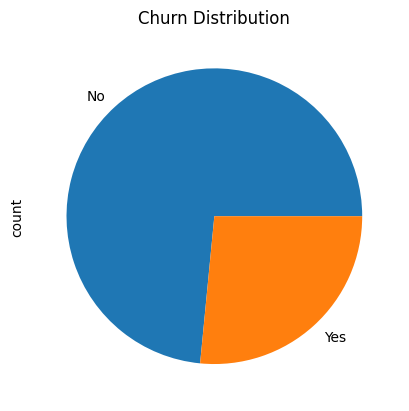

In [18]:
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind ="pie")
plt.title("Churn Distribution")
plt.ylabel
plt.show()

Considering we have more Nos than Yes, will this affect my model?

In [19]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [20]:
# To check groupby Churn parameters: At higher MonthlyCharges there is more Churn

df.groupby("Churn")["MonthlyCharges"].mean()

,MonthlyCharges
Churn,
No,61.265124
Yes,74.441332


In [21]:
df.groupby(["Churn","gender"])["MonthlyCharges"].mean()

# Higer MonthlyCharges affected both male and female and the churn rate

Churn  gender
No     Female    61.664908
       Male      60.876914
Yes    Female    74.812087
       Male      74.066989
Name: MonthlyCharges, dtype: float64

In [22]:
"""
Customers who did not churn have an average tenure of approximately 37.57 months.
Customers who did churn have a much lower average tenure of approximately 17.98 months.
The lesser time spent with a company, the more likely they are to churn.
"""

df.groupby("Churn")["tenure"].mean()

,tenure
Churn,
No,37.569965
Yes,17.979133


In [23]:
# This suggests that longer contract terms are associated with lower average monthly
# costs for customers.

df.groupby("Contract")["MonthlyCharges"].mean()

,MonthlyCharges
Contract,
Month-to-month,66.398490
One year,65.048608
Two year,60.770413


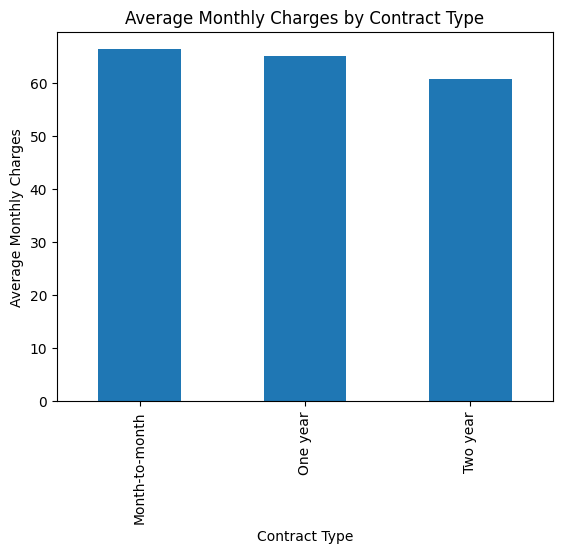

In [24]:
df.groupby("Contract")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Average Monthly Charges")
plt.xlabel("Contract Type")
plt.title("Average Monthly Charges by Contract Type")
plt.show()

 customers who commit to longer contracts tend to have lower average monthly charges compared to those with shorter, more flexible contracts.

In [25]:
# Since there is an importance to monthly charge, I am trying to get more information, considering a bin

df["MonthlyCharges"].value_counts()

,count
MonthlyCharges,
20.05,61
19.85,45
19.95,44
19.90,44
20.00,43
...,...
56.85,1
101.70,1
48.40,1


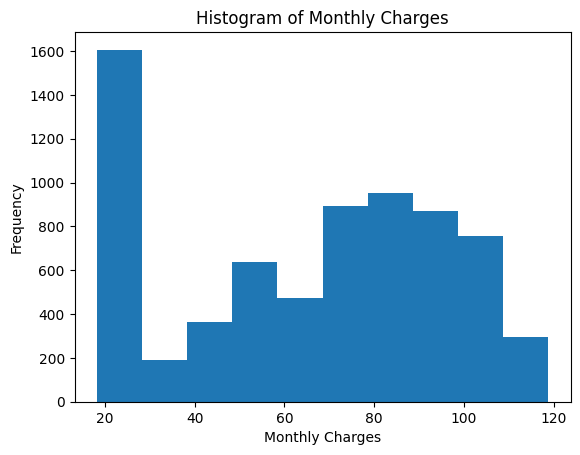

In [26]:
plt.hist(df['MonthlyCharges'])
plt.title("Histogram of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

**Reasoning**:
Examine the distribution of MonthlyCharges by creating bin category and checking the churn by this category.

MonthlyCharges_Category_Custom
18-40     1837
41-60     1070
61-80     1459
81-100    1769
101+       907
Name: count, dtype: int64


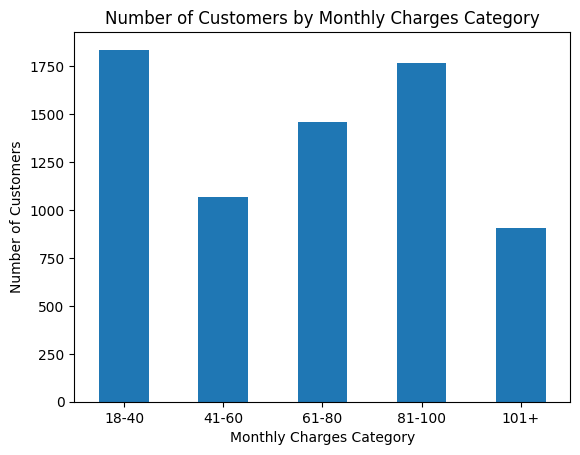

In [27]:
# Define the bins and use that to check churn customer rate by monthly charge

bins_custom = [18, 40, 60, 80, 100, df['MonthlyCharges'].max()]
labels_custom = ['18-40', '41-60', '61-80', '81-100', '101+']

df['MonthlyCharges_Category_Custom'] = pd.cut(
    df['MonthlyCharges'],
    bins=bins_custom,
    labels=labels_custom,
    right=False
)

# Get the counts for each category
monthly_charges_category_counts = df['MonthlyCharges_Category_Custom'].value_counts().sort_index()

# Display the counts and create a bar plot
print(monthly_charges_category_counts)
monthly_charges_category_counts.plot(kind='bar')
plt.title("Number of Customers by Monthly Charges Category")
plt.xlabel("Monthly Charges Category")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()


We have more 18-40 and 81-100 monthly payment

Churn                             No  Yes
MonthlyCharges_Category_Custom           
18-40                           1624  213
41-60                            794  276
61-80                            989  470
81-100                          1116  653
101+                             650  257


/tmp/ipython-input-3278784718.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_category = df.groupby(['MonthlyCharges_Category_Custom', 'Churn']).size().unstack(fill_value=0)


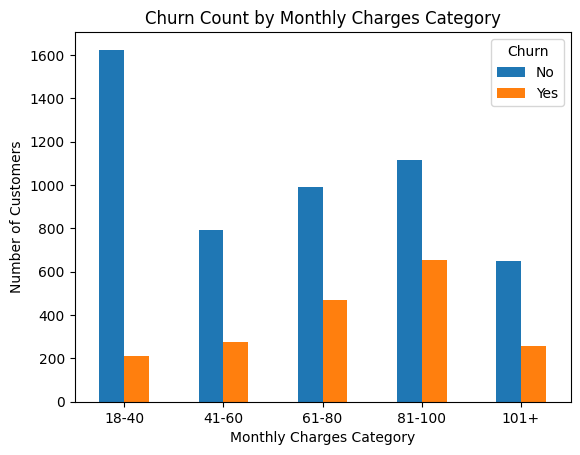

In [28]:
# Group by category and churn, then count customers
churn_by_category = df.groupby(['MonthlyCharges_Category_Custom', 'Churn']).size().unstack(fill_value=0)

# Display the table
print(churn_by_category)

# Plot
churn_by_category.plot(kind='bar')
plt.title("Churn Count by Monthly Charges Category")
plt.xlabel("Monthly Charges Category")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Churn")
plt.show()


We can see there are more churn in group of 61-80 and 81-100 monthly payment

In [29]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Category_Custom
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,18-40
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,41-60


In [30]:
# Analyzing other column with the churn to see what feature have more churn especially for Categorical data types

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MonthlyCharges_Category_Custom'],
      dtype='object')

In [31]:
cols_to_analyze = [
    'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity','DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod',
]

# Loop through each column and print churn count
for col in cols_to_analyze:
    print(f"\n===== Churn count by {col} =====")
    churn_table = pd.crosstab(df[col], df['Churn'])
    print(churn_table)



===== Churn count by SeniorCitizen =====
Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476

===== Churn count by Partner =====
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669

===== Churn count by Dependents =====
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326

===== Churn count by tenure =====
Churn    No  Yes
tenure          
0        11    0
1       233  380
2       115  123
3       106   94
4        93   83
...     ...  ...
68       91    9
69       87    8
70      108   11
71      164    6
72      356    6

[73 rows x 2 columns]

===== Churn count by PhoneService =====
Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699

===== Churn count by MultipleLines =====
Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850

====

We have more churn with customers without OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Senior citizen, multiplelines,dependents and partners

Internet service from customers that use Fiber optic

In [32]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Category_Custom
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,18-40
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,41-60


# Data Splitting and Preparation

Model


In [33]:
# Import libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [34]:
# Define what I want to predict
target = 'Churn'

# Define feature columns (predictors)
features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection',
    'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
    'StreamingTV', 'StreamingMovies'
]

# Split X (features) and y (target)
X = df[features]
y = df[target]


In [35]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()
encoders = {}  # store each encoder separately

for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    encoders[col] = le  # save encoder per column

# encode target
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [37]:
 y_encoded

array([0, 0, 1, ..., 0, 1, 0])

In [38]:
 X_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,StreamingTV,StreamingMovies
0,0,0,1,0,1,1,0,0,0,0,0,1,29.85,0,0
1,1,0,0,0,34,0,0,2,2,0,1,0,56.95,0,0
2,1,0,0,0,2,0,0,2,0,0,0,1,53.85,0,0
3,1,0,0,0,45,1,0,2,2,2,1,0,42.30,0,0
4,0,0,0,0,2,0,1,0,0,0,0,1,70.70,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,2,0,2,2,2,1,1,84.80,2,2
7039,0,0,1,1,72,2,1,0,2,0,1,1,103.20,2,2
7040,0,0,1,1,11,1,0,2,0,0,0,1,29.60,0,0
7041,1,1,1,0,4,2,1,0,0,0,0,1,74.40,0,0


# Model Evaluation and Selection

In [39]:
# I am starting with a RandomForestclassifier Model

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=10,
    class_weight='balanced'
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

Accuracy: 0.7693399574166075

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.55      0.71      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409



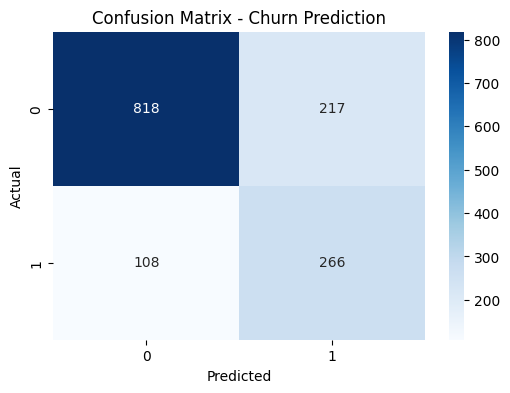

In [40]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Churn Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Metric	Interpretation**

Accuracy = 0.77	Model correctly predicts churn status 77% of the time

Precision (Churn = 0.55)	55% of predicted churners actually churn

Recall (Churn = 0.71)	Model identifies 71% of true churners

F1-Score (Churn = 0.62)	Balanced score between precision and recall

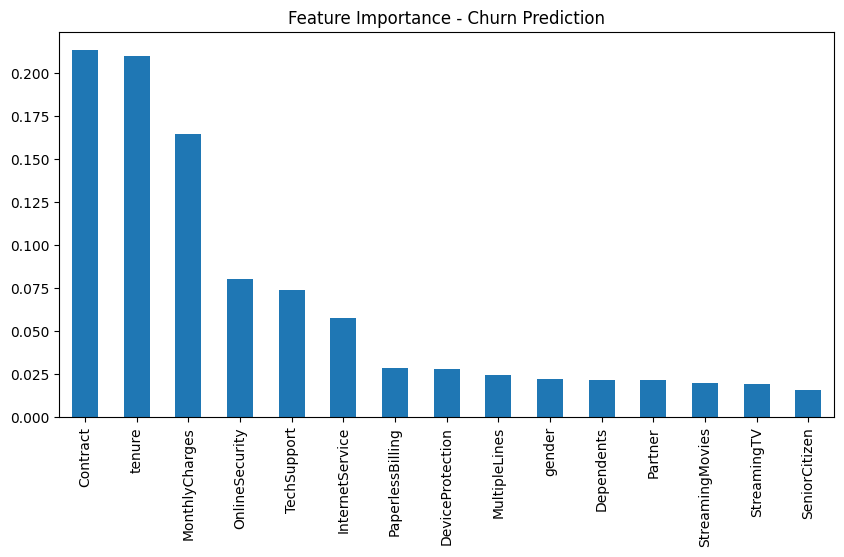

In [41]:
# Feature importance
importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Feature Importance - Churn Prediction')
plt.show()


The Drive of churn from this result is Contract,tenure,Monthly charge, Onlinesecurity, techsupport, Internetservice etc

# Train the Logistic Regression Model

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
# Initialize Logistic Regression model
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train model
log_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Accuracy: 0.7359829666430092

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



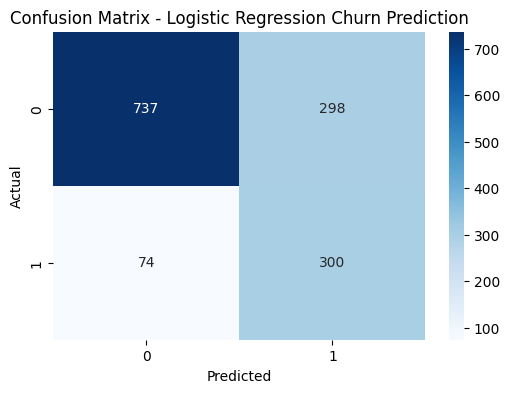

In [44]:
# Predictions
y_pred = log_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression Churn Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


             Feature  Coefficient
10          Contract    -0.796446
11  PaperlessBilling     0.390973
7     OnlineSecurity    -0.294297
3         Dependents    -0.276178
9        TechSupport    -0.263186
1      SeniorCitizen     0.211023
5      MultipleLines     0.134543
14   StreamingMovies     0.070818
8   DeviceProtection    -0.065939
13       StreamingTV     0.063684
2            Partner     0.039821
4             tenure    -0.032422
0             gender     0.031496
12    MonthlyCharges     0.021150
6    InternetService     0.005374


/tmp/ipython-input-1416278506.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='coolwarm')


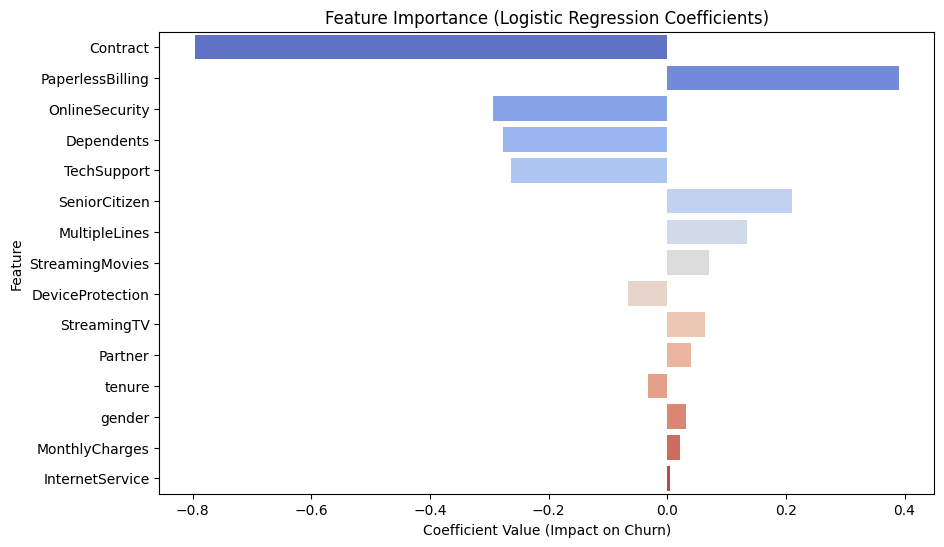

In [45]:
# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': log_model.coef_[0]
})

# Sort by absolute value
feature_importance['abs_coef'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('abs_coef', ascending=False)

# Display table
print(feature_importance[['Feature', 'Coefficient']])

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value (Impact on Churn)')
plt.ylabel('Feature')
plt.show()


Positive means they wont leave while Negative means they will leave

**Strong Retention Factors	 Strong Churn Drivers**

Contract (long-term)	Month-to-month Contract
Online Security	      Paperless Billing
Tech Support	   Senior Citizens
Dependents	    Multiple Lines

Practical Business Insights

Focus on customers with month-to-month contracts, senior citizens, and those using paperless billing — they’re the most churn-prone groups.


Create a comparison data between Random Forest and Logistic Regression Model

In [46]:
# Prepare the Data for Comparison
# Create a comparison DataFrame
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (No)', 'Recall (No)', 'F1-score (No)',
               'Precision (Churn)', 'Recall (Churn)', 'F1-score (Churn)',
               'Macro Avg F1', 'Weighted Avg F1'],
    'RandomForest': [0.769, 0.88, 0.79, 0.83, 0.55, 0.71, 0.62, 0.73, 0.78],
    'LogisticRegression': [0.736, 0.91, 0.71, 0.80, 0.50, 0.80, 0.62, 0.71, 0.75]
})

comparison


,Metric,RandomForest,LogisticRegression
0,Accuracy,0.769,0.736
1,Precision (No),0.880,0.910
2,Recall (No),0.790,0.710
3,F1-score (No),0.830,0.800
4,Precision (Churn),0.550,0.500
5,Recall (Churn),0.710,0.800
6,F1-score (Churn),0.620,0.620
7,Macro Avg F1,0.730,0.710
8,Weighted Avg F1,0.780,0.750


# My Model predicted Better for Churn than No Churn

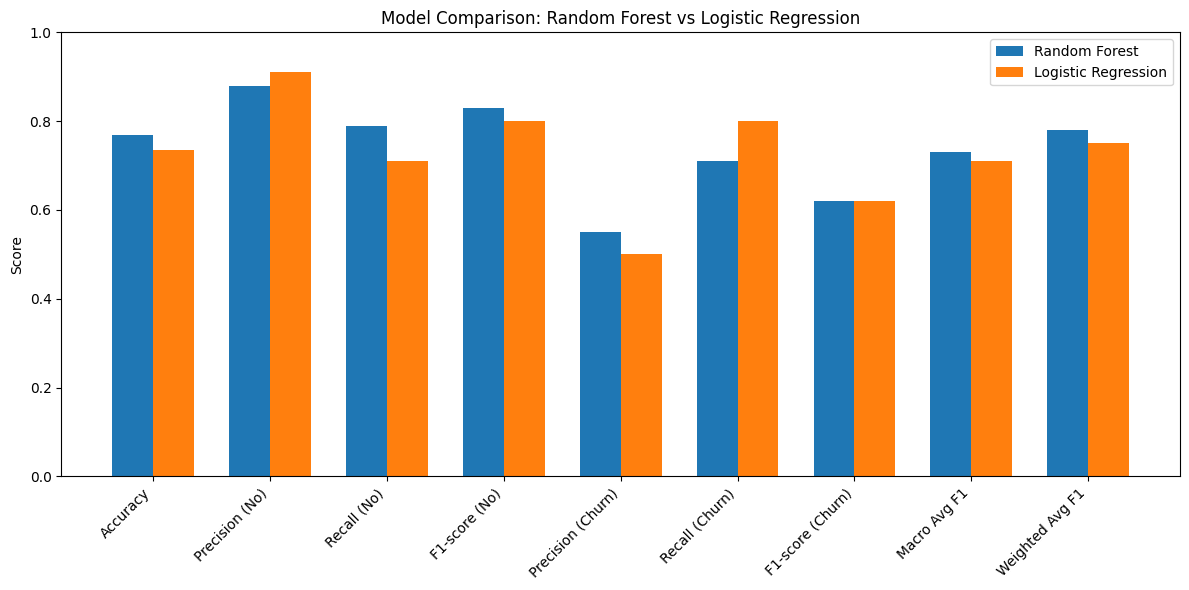

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Set positions
x = np.arange(len(comparison['Metric']))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, comparison['RandomForest'], width, label='Random Forest')
plt.bar(x + width/2, comparison['LogisticRegression'], width, label='Logistic Regression')

plt.xticks(x, comparison['Metric'], rotation=45, ha='right')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Model Comparison: Random Forest vs Logistic Regression')
plt.legend()
plt.tight_layout()
plt.show()


Using Xgboost to tune my model and see if it helps

In [48]:
!pip install xgboost

In [49]:
import xgboost as xgb
from xgboost import XGBClassifier

In [50]:
# Initialize XGBoost model
xgb_model = XGBClassifier(
    n_estimators=200,         # Number of trees
    max_depth=5,              # Maximum depth of each tree
    learning_rate=0.1,        # Step size shrinkage
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),  # Handle class imbalance
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:47:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

Accuracy: 0.7480482611781405

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.76      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.75      0.76      1409



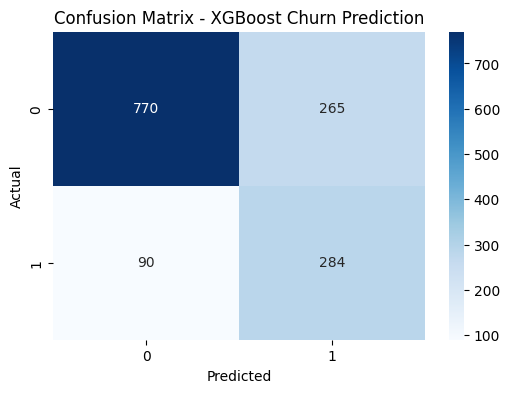

In [51]:
# Predict
y_pred = xgb_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost Churn Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


             Feature  Importance
10          Contract    0.432798
6    InternetService    0.110331
7     OnlineSecurity    0.109587
9        TechSupport    0.066135
14   StreamingMovies    0.035445
4             tenure    0.033657
12    MonthlyCharges    0.027878
5      MultipleLines    0.026808
11  PaperlessBilling    0.026312
3         Dependents    0.024209
13       StreamingTV    0.024097
1      SeniorCitizen    0.023323
0             gender    0.022848
8   DeviceProtection    0.021501
2            Partner    0.015073


/tmp/ipython-input-1356066321.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


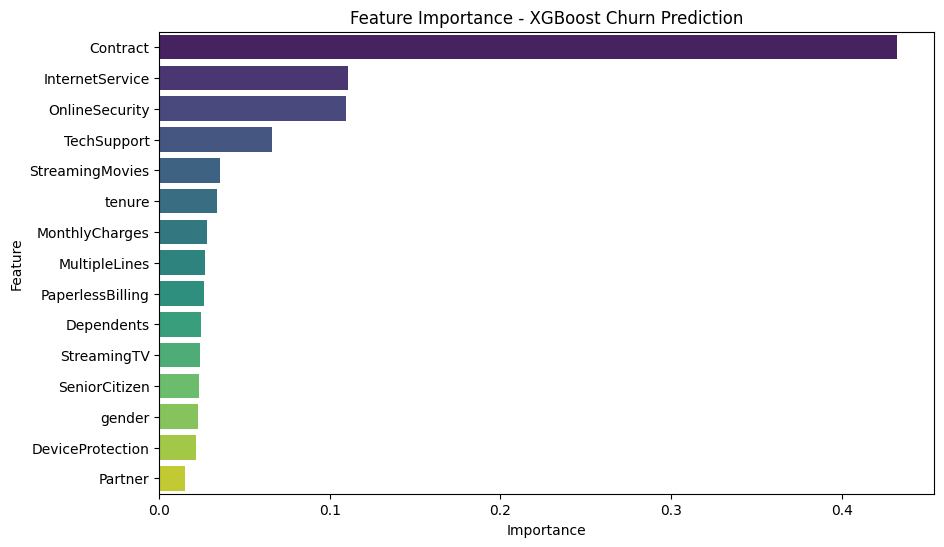

In [52]:
# Get feature importance
importances = xgb_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display table
print(feature_importance)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance - XGBoost Churn Prediction")
plt.show()


The Result is close to Random forest and Logistics regression model. The Drive for rentension is similar to that of Random Forest Model

Comparism between all 3 models

In [53]:

# Comparison data
comparison = pd.DataFrame({
    'Metric': [
        'Accuracy',
        'Precision (No Churn)',
        'Recall (No Churn)',
        'F1-score (No Churn)',
        'Precision (Churn)',
        'Recall (Churn)',
        'F1-score (Churn)',
        'Macro F1',
        'Weighted F1'
    ],
    'RandomForest': [0.769, 0.88, 0.79, 0.83, 0.55, 0.71, 0.62, 0.73, 0.78],
    'LogisticRegression': [0.736, 0.91, 0.71, 0.80, 0.50, 0.80, 0.62, 0.71, 0.75],
    'XGBoost': [0.748, 0.90, 0.74, 0.81, 0.52, 0.76, 0.62, 0.71, 0.76]
})

# Display table
comparison


,Metric,RandomForest,LogisticRegression,XGBoost
0,Accuracy,0.769,0.736,0.748
1,Precision (No Churn),0.880,0.910,0.900
2,Recall (No Churn),0.790,0.710,0.740
3,F1-score (No Churn),0.830,0.800,0.810
4,Precision (Churn),0.550,0.500,0.520
5,Recall (Churn),0.710,0.800,0.760
6,F1-score (Churn),0.620,0.620,0.620
7,Macro F1,0.730,0.710,0.710
8,Weighted F1,0.780,0.750,0.760


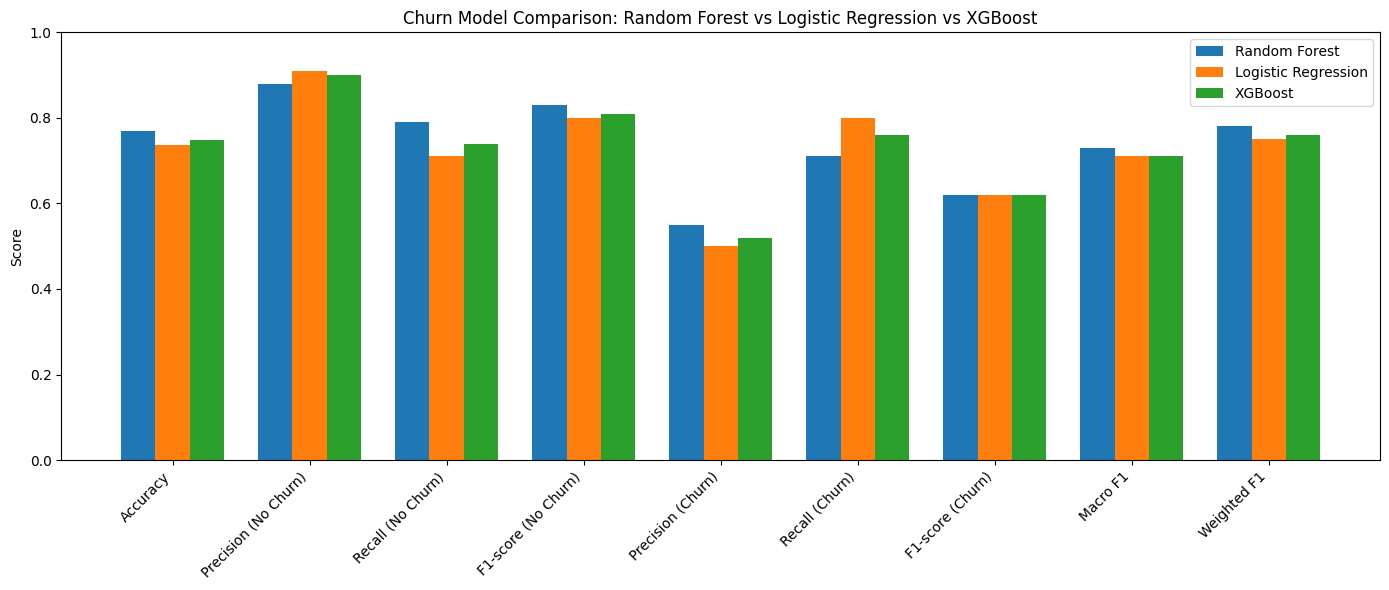

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Set positions for grouped bars
x = np.arange(len(comparison['Metric']))
width = 0.25

plt.figure(figsize=(14,6))
plt.bar(x - width, comparison['RandomForest'], width, label='Random Forest')
plt.bar(x, comparison['LogisticRegression'], width, label='Logistic Regression')
plt.bar(x + width, comparison['XGBoost'], width, label='XGBoost')

plt.xticks(x, comparison['Metric'], rotation=45, ha='right')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Churn Model Comparison: Random Forest vs Logistic Regression vs XGBoost')
plt.legend()
plt.tight_layout()
plt.show()


Business Insight:

Random Forest or XGBoost for production predictions.

Logistic Regression to explain drivers of churn to stakeholders.

These are the drive to be used for Churn prediction of this Project


Contract, Tenure,Monthly Charges,Internet Service Type,Tech Support , Online Security, Device Protection. Does that mean i have to redo this project with these features?

# Random forest model perform better than other model and will be deployed to Steamlit

In [55]:
import joblib

# Save model
joblib.dump(model, "model.pkl")

# Save encoders
joblib.dump(encoders, "encoders.pkl")

# Save target encoder
joblib.dump(target_encoder, "target_encoder.pkl")


['target_encoder.pkl']

**Download the packages**

In [56]:
from google.colab import files
files.download("model.pkl")
files.download("encoders.pkl")
files.download("target_encoder.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Created a requirements.txt file**

In [57]:
%%writefile requirements.txt
streamlit
pandas
numpy
scikit-learn
joblib
xgboost


Writing requirements.txt


In [58]:
from google.colab import files
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Create app.py**

In [59]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib

# Load model and encoders
model = joblib.load("model.pkl")
encoders = joblib.load("encoders.pkl")
target_encoder = joblib.load("target_encoder.pkl")

st.title("Customer Churn Prediction App")
st.write("Predict whether a customer will churn based on their profile and service usage.")

# Input form
gender = st.selectbox("Gender", ["Male", "Female"])
senior = st.selectbox("Senior Citizen", [0, 1])
partner = st.selectbox("Partner", ["Yes", "No"])
dependents = st.selectbox("Dependents", ["Yes", "No"])
tenure = st.number_input("Tenure (Months)", min_value=0, max_value=100)
multiple_lines = st.selectbox("Multiple Lines", ["Yes", "No"])
internet = st.selectbox("Internet Service", ["DSL", "Fiber optic", "No"])
online_security = st.selectbox("Online Security", ["Yes", "No"])
device_protection = st.selectbox("Device Protection", ["Yes", "No"])
tech_support = st.selectbox("Tech Support", ["Yes", "No"])
contract = st.selectbox("Contract", ["Month-to-month", "One year", "Two year"])
paperless = st.selectbox("Paperless Billing", ["Yes", "No"])
monthly_charges = st.number_input("Monthly Charges", min_value=0.0)
streaming_tv = st.selectbox("Streaming TV", ["Yes", "No"])
streaming_movies = st.selectbox("Streaming Movies", ["Yes", "No"])

# Prepare input as DataFrame
input_data = pd.DataFrame({
    "gender": [gender],
    "SeniorCitizen": [senior],
    "Partner": [partner],
    "Dependents": [dependents],
    "tenure": [tenure],
    "MultipleLines": [multiple_lines],
    "InternetService": [internet],
    "OnlineSecurity": [online_security],
    "DeviceProtection": [device_protection],
    "TechSupport": [tech_support],
    "Contract": [contract],
    "PaperlessBilling": [paperless],
    "MonthlyCharges": [monthly_charges],
    "StreamingTV": [streaming_tv],
    "StreamingMovies": [streaming_movies],
})

# Encode categorical columns
for col in encoders:
    input_data[col] = encoders[col].transform(input_data[col])

# Predict
if st.button("Predict Churn"):
    prediction = model.predict(input_data)
    result = target_encoder.inverse_transform(prediction)[0]

    if result == "Yes":
        st.error("⚠️ This customer is likely to CHURN.")
    else:
        st.success("✅ This customer is NOT likely to churn.")


Writing app.py
